In [151]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import salem
import swiss_uhi_utils as suhi
import xarray as xr
from rasterio import transform

from lausanne_greening_scenarios import utils

In [3]:
metrics = ['proportion_of_landscape', 'area_mn', 'shape_index_am', 'edge_density', 'largest_patch_index']

In [4]:
biophysical_table_filepath = '../data/processed/biophysical-table.csv'
lulc_raster_filepath = '../data/processed/agglom-lulc.tif'
# t_da_filepath = '../data/interim/lst-da.nc'
t_da_filepath = '../data/processed/tair-ucm.nc'

In [5]:
ls, ls_meta = utils.get_reclassif_landscape(
    lulc_raster_filepath, biophysical_table_filepath)

In [6]:
lulc_da = salem.open_xr_dataset(lulc_raster_filepath)['data']
t_da = suhi.align_ds(xr.open_dataarray(t_da_filepath), lulc_da)

In [7]:
zone_pixel_width = 60
zone_pixel_height = 60
zga = utils.get_zonal_grid_analysis(ls, ls_meta, zone_pixel_width=zone_pixel_width, zone_pixel_height=zone_pixel_height)

In [188]:
regr_df = pd.DataFrame([np.nanmean(utils.get_zonal_grid_t_arrs(day_da.values, zga), axis=(1, 2)) for date, day_da in t_da.groupby('time')]).transpose().rename_axis(index='zone', columns='date').stack().rename('T').reset_index()
regr_df['date'] = regr_df['date'].replace(pd.Series(t_da['time']))

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [173]:
crs = zga.landscape_meta['crs']
p_center = gpd.GeoSeries([utils.BASE_MASK], crs=utils.BASE_MASK_CRS).to_crs(crs).iloc[0]
zone_dist_ser = gpd.GeoSeries(gpd.points_from_xy(*transform.xy(zga.landscape_meta['transform'], *np.array(zga.zones).transpose())), crs=crs).apply(lambda p: p_center.distance(p))

In [189]:
regr_df['dist'] = regr_df['zone'].replace(zone_dist_ser)

In [190]:
regr_df

,zone,date,T,dist
0,0,2018-05-25,18.223639,9837.801458
1,0,2018-06-19,20.129546,9837.801458
2,0,2018-06-26,18.661063,9837.801458
3,0,2019-06-13,16.181408,9837.801458
4,0,2019-06-29,24.531423,9837.801458
...,...,...,...,...
2923,369,2019-06-13,17.080573,8118.291844
2924,369,2019-06-29,25.292296,8118.291844
2925,369,2019-07-24,28.530021,8118.291844
2926,369,2019-08-09,22.047438,8118.291844


In [180]:
regr_df

,zone,date,T,dist
0,0,0,18.223639,9837.801458
1,0,1,20.129546,9837.801458
2,0,2,18.661063,9837.801458
3,0,3,16.181408,9837.801458
4,0,4,24.531423,9837.801458
...,...,...,...,...
2923,369,3,17.080573,8118.291844
2924,369,4,25.292296,8118.291844
2925,369,5,28.530021,8118.291844
2926,369,6,22.047438,8118.291844


In [114]:
pd.Series(np.array([np.nanmean(utils.get_zonal_grid_t_arrs(day_da.values, zga), axis=(1, 2)) for date, day_da in t_da.groupby('time')]).flatten())

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


0       18.223639
1       18.285501
2       18.296370
3       18.384642
4       18.222581
          ...    
2955    18.239819
2956    18.989007
2957    19.052155
2958    19.047647
2959    19.022976
Length: 2960, dtype: float64

In [ ]:
def fun(args):
    


In [92]:
zonal_t_arrs

array([[18.22363853, 18.28550056, 18.29637007, ..., 19.09206593,
        19.08824185, 19.06841183],
       [20.12954588, 20.2053166 , 20.21902817, ..., 21.18380928,
        21.1794185 , 21.15548749],
       [18.66106341, 18.74574862, 18.76139234, ..., 19.83976651,
        19.8346784 , 19.80770795],
       ...,
       [27.79936524, 27.8529015 , 27.86227308, ..., 28.55060563,
        28.54721899, 28.53002113],
       [20.73499059, 20.83142607, 20.84924771, ..., 22.08358424,
        22.07798063, 22.04743775],
       [17.9604877 , 18.03835332, 18.05255214, ..., 19.05215498,
        19.04764748, 19.02297602]])

In [88]:
# zga_transform = zga.landscape_meta['transform']
# zonal_t_ds = salem.Grid(proj=zga.landscape_meta['crs'].to_proj4(), nxny=(zga.landscape_meta['width'], zga.landscape_meta['height']), dxdy=(zga_transform.a, zga_transform.e), x0y0=(zga_transform.c, zga_transform.f)).to_dataset()

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/pyproj/crs/crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


In [90]:
zonal_t_ds

<xarray.Dataset>
Dimensions:  (t: 370, x: 35, y: 17)
Coordinates:
  * x        (x) float64 2.525e+06 2.525e+06 2.526e+06 ... 2.545e+06 2.545e+06
  * y        (y) float64 1.159e+06 1.159e+06 1.158e+06 ... 1.15e+06 1.15e+06
  * t        (t) float64 17.96 18.04 18.05 18.16 ... 18.99 19.05 19.05 19.02
Data variables:
    *empty*
Attributes:
    pyproj_srs:  +proj=somerc +lat_0=46.9524055555556 +lon_0=7.43958333333333...

In [45]:
zga_grid.to_dataset()

<xarray.DataArray 'T' (time: 8, y: 17, x: 35)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, 18.3788794 , 18.87354748, ..., 18.77675946,
         18.54082016, 18.23996751],
        [        nan, 18.39496591, 18.87101187, ..., 18.83330513,
         18.90089283, 18.69590652],
        [        nan, 18.23839766, 18.4121393 , ..., 19.02116377,
         19.04886433, 18.91178184]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan, 20.97481074, 21.74263677, ..., 21.59533905,
         21.22894555, 20.76130234],
        [        nan, 20.99960583, 21.73847156, ..., 21.68242409,
         21.78805362, 21.46983644],
        [        nan, 20.75655925, 21.02627655, ..., 21.97342016,
         22.01685239, 21.8043204 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan, 18.15735848, 18.77925405, ..., 18.65724459,
         18.36110321, 17.98287439],
        [        nan, 18.17773719, 18.77632539, ..., 18.72784527,
         18.81296759, 18.55570324],
        [        nan, 17.98094539, 18.19937837, ..., 18.96315848,
         18.9979961 , 18.82625809]]])
Coordinates:
  * time     (time) datetime64[ns] 2018-05-25 2018-06-19 ... 2019-08-25
  * x        (x) float64 2.525e+06 2.525e+06 2.526e+06 ... 2.545e+06 2.545e+06
  * y        (y) float64 1.159e+06 1.159e+06 1.158e+06 ... 1.15e+06 1.15e+06
Attributes:
    pyproj_srs:  +proj=somerc +lat_0=46.9524055555556 +lon_0=7.43958333333333...

In [73]:
metric_ser = np.nanmean(utils.get_zonal_grid_t_arrs(t_da.isel(time=0).values, zga), axis=(1, 2))
zonal_statistics_arr = np.full(
    (zga.landscape_meta['height'], zga.landscape_meta['width']),
    np.nan, dtype=metric_ser.dtype)
for metric_val, mask_arr in zip(metric_ser, zga.masks_arr):
    zonal_statistics_arr[mask_arr] = metric_val

/home/martibosch/anaconda3/envs/lausanne-greening-scenarios/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


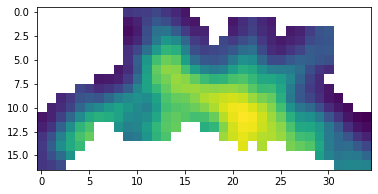

In [74]:
plt.imshow(zonal_statistics_arr)

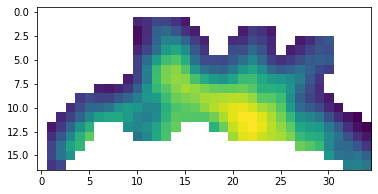

In [79]:
plt.imshow(day_da.values)

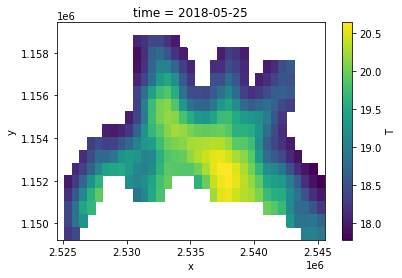

In [75]:
for date, day_da in zga_grid.to_dataset().salem.transform(t_da).groupby('time'):
    day_da.plot()
    break

In [27]:
t_da.salem.grid

<salem.Grid>
  proj: +ellps=bessel +k_0=1 +lat_0=46.9524055555556 +lon_0=7.43958333333333 +no_defs+proj=somerc +towgs84=674.374,15.056,405.346,0,0,0,0 +units=m +x_0=2600000 +y_0=1200000
  pixel_ref: center
  origin: upper-left
  (nx, ny): (2131, 1052)
  (dx, dy): (10.0, -10.0)
  (x0, y0): (2524843.0, 1159128.0)

In [ ]:
zga_grid

In [25]:
smap

NameError: name 'smap' is not defined

In [ ]:
np.

In [8]:
zga.landscape_meta['transform']

{'driver': 'GTiff',
 'width': 35,
 'height': 17,
 'count': 1,
 'transform': Affine(600.0, 0.0, 2524843.0,
        0.0, -600.0, 1159128.0),
 'crs': CRS.from_epsg(2056)}

In [ ]:
def get_regr_df(t_da, zga):
    pass


In [ ]:
get_zonal_grid_